In [19]:
# Load Pandas liabrary
import pandas as pd
import matplotlib.pyplot as plt
import math
import lifelines
import pandas_ml 
import numpy as np


# Reading data from Obituaries_Dataset.csv
data = pd.read_csv("Obituaries_Dataset.csv")

# Preview the first 5 lines of loaded data
data.head()


,Name,Announcement,Death,Burial,Burial_Day,Burial_Week,Gender,Age,Color,Size,...,Morgue,Same_Morgue,Cost_Morgue,Occupation,Repetition,Corporate,Corporate_Name,Residence,Residence_Name,Residence_Category
0,Eng. Paul Chemweno,11/8/2017,11/2/2017,11/17/2017,Friday,Weekday,Male,66.0,Yes,55.18,...,MTRH Eldoret,No,NaN,Director,NaN,NaN,NaN,NaN,NaN,NaN
1,Edith Kiende Kiogora,11/8/2017,10/27/2017,11/11/2017,Saturday,Weekend,Female,43.0,Yes,83.60,...,Chogoria Hospital Mortuary,No,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
2,Simon Muchiri Ngigii Mbaria,11/8/2017,11/1/2017,11/8/2017,Wednesday,Weekday,Male,35.0,Yes,109.12,...,Umash Nakuru,No,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
3,Mwalimu Erick Namusasi Werunga,11/8/2017,10/24/2017,11/9/2017,Thursday,Weekday,Male,54.0,Yes,83.60,...,Maida Mortuary,NaN,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
4,Catherine Mueni Sina,11/8/2017,11/2/2017,11/11/2017,Saturday,Weekend,Female,41.0,No,55.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Selecting Rows that I will use in Survival Analysis i.e:  gender, colour, fundraising, spouse alive, spouse gender
clean_data = data[['Gender','Age','Color','Fundraising','Spouse_Alive', 'Spouse_gender']]

clean_data.head()

,Gender,Age,Color,Fundraising,Spouse_Alive,Spouse_gender
0,Male,66.0,Yes,Yes,Yes,Female
1,Female,43.0,Yes,Yes,Yes,Male
2,Male,35.0,Yes,No,Yes,Female
3,Male,54.0,Yes,No,No,Female
4,Female,41.0,No,NaN,NaN,Male


In [6]:
# Saving the dataset I need to CSV
clean_data.to_csv('Obituaries_clean_data', encoding='utf-8', index=False)

# Display a sample of the clean dataset
df = pd.read_csv("Obituaries_clean_data")
df.head()

,Gender,Age,Color,Fundraising,Spouse_Alive,Spouse_gender
0,Male,66.0,Yes,Yes,Yes,Female
1,Female,43.0,Yes,Yes,Yes,Male
2,Male,35.0,Yes,No,Yes,Female
3,Male,54.0,Yes,No,No,Female
4,Female,41.0,No,NaN,NaN,Male


In [7]:
# We shall plot  Kaplan-meier survival curve using the gender variable in the X axis and Age on the Y axis

# Count all the male and female in the total dataset to also ensure that each record has a value.
# This will ease plotting survival curve

df["Gender"].value_counts(dropna=False)

Male      714
Female    577
Name: Gender, dtype: int64

In [8]:
# We shall convert gender to Binary digits for ease to plot. Male == 0 and Female == 1. We shall use replace function.

df1 = df.replace({'Gender': {'Male': 0, 'Female': 1}})

df1.head()


,Gender,Age,Color,Fundraising,Spouse_Alive,Spouse_gender
0,0,66.0,Yes,Yes,Yes,Female
1,1,43.0,Yes,Yes,Yes,Male
2,0,35.0,Yes,No,Yes,Female
3,0,54.0,Yes,No,No,Female
4,1,41.0,No,NaN,NaN,Male


In [10]:
#Check if all rows of Age are filled.This is because we are plotting Gender against Age and each column needs to be complete

df1 = df1[pd.notnull(df['Age'])]

df1.to_csv('Obituaries_clean_data_v2', encoding='utf-8', index=False)

# Load cleaned data
df2 = pd.read_csv("Obituaries_clean_data_v2")
df2.head()



,Gender,Age,Color,Fundraising,Spouse_Alive,Spouse_gender
0,0,66.0,Yes,Yes,Yes,Female
1,1,43.0,Yes,Yes,Yes,Male
2,0,35.0,Yes,No,Yes,Female
3,0,54.0,Yes,No,No,Female
4,1,41.0,No,NaN,NaN,Male


In [11]:
from lifelines import KaplanMeierFitter

# Now we shall plot a Kaplan-Meier curve using age and gender. 
# Age is an array of durations lived, gender is a boolean or binary array representing the “gender” 
# In our lifeline we assume all deaths were observed
T = df2['Age']
E = df2['Gender']

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label = 'Age Distribution')  
# This gives the median age when death occurs of the data that had age
kmf.median_


84.0

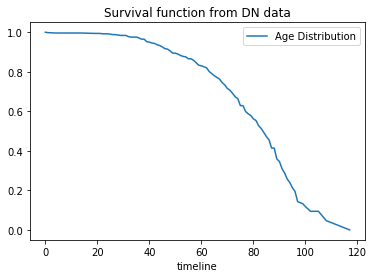

In [12]:
kmf.survival_function_.plot()
plt.title('Survival function from DN data');


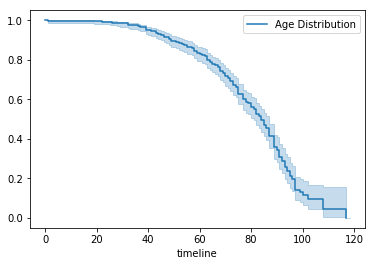

In [13]:
kmf.plot()

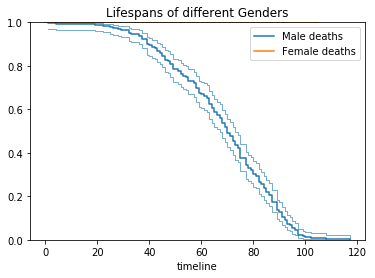

In [14]:
ax = plt.subplot(111)
male = (df2["Gender"] == 1)

kmf.fit(T[male], event_observed=E[male], label="Male deaths")
kmf.plot(ax=ax, ci_force_lines=True)

kmf.fit(T[~male], event_observed=E[~male], label="Female deaths")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0, 1);
plt.title("Lifespans of different Genders");

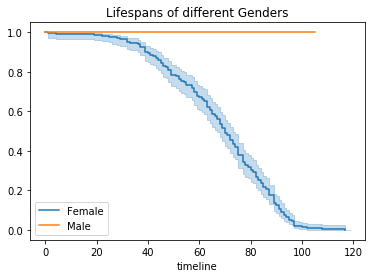

In [15]:
groups = df2['Gender']
ix = (groups == 0)

kmf.fit(T[~ix], E[~ix], label='Female')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='Male')
ax = kmf.plot(ax=ax)
plt.title("Lifespans of different Genders");

In [38]:
# Question 2
# Predict deaths that are likely to need fundraising. 
# Use algorithm of your own choice. Include the confusion matrix, F1 score, sensitivity, and specificity.

#We shall use the Binary confusion Matrix. In this case, since we need to have an assumption of the prediction, we shall assume,
#All people aged above 50 years require fundraising, then compare this assumption to the actual fundraising data provided.

df1.head()
df1['Fundraising_prediction'] = np.where(df2['Age']>=50.0, 'Yes', 'No')
df1.head()


,Gender,Age,Color,Fundraising,Spouse_Alive,Spouse_gender,Fundraising_prediction
0,0,66.0,Yes,Yes,Yes,Female,Yes
1,1,43.0,Yes,Yes,Yes,Male,No
2,0,35.0,Yes,No,Yes,Female,No
3,0,54.0,Yes,No,No,Female,Yes
4,1,41.0,No,NaN,NaN,Male,No


In [50]:
from pandas_ml import ConfusionMatrix
# Define actual values for fundraising and predicted values
y_true = df1['Fundraising'].tolist()
y_pred = df1['Fundraising_prediction'].tolist()

# Plot confusion Matrix
confusion_matrix = ConfusionMatrix(y_true, y_pred)
print("Confusion Matrix: \n\n%s" % confusion_matrix)


Confusion Matrix: 

Predicted   No  Yes  __all__
Actual                      
No          34  143      177
Yes         71  207      278
__all__    105  350      455


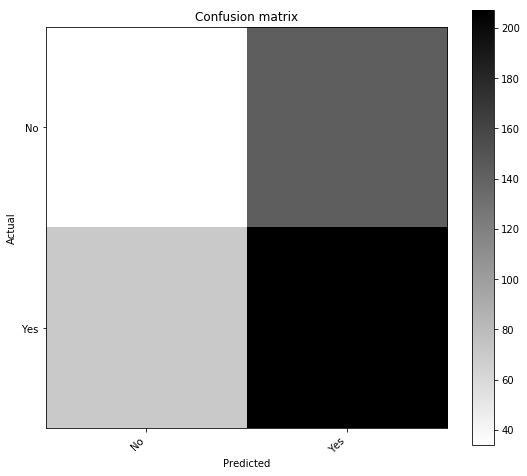

In [52]:
# Matplot lib for binary confusion matrix
confusion_matrix.plot()
plt.show()

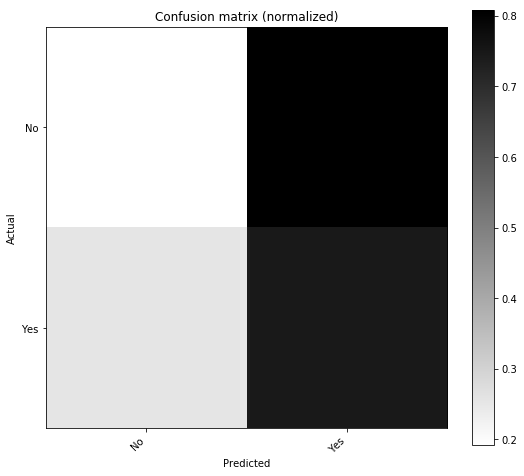

In [53]:
# Matplotlib for normalized confusion matrix
confusion_matrix.plot(normalized=True)
plt.show()